# Región de confianza no Gaussiana 

Usando la función de costo / verosimilitud

In [1]:
%matplotlib notebook

In [2]:
import math
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from scipy.stats import chi2
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [3]:
def get_ellipse(center, cova, nsigma=1):
    L = np.linalg.cholesky(cova)
    t = np.linspace(0, 2 * np.pi, 1000)
    circulo = np.column_stack([np.cos(t), np.sin(t)])
    elipse =  nsigma * circulo @ L.T + center
    return elipse.T

## Datos

In [4]:
xdata = np.array([191, 263, 309])  # distancia en metros
ydata = np.array([33, 19, 11])     # número de partículas medidas

In [5]:
ndatos = len(xdata)
ndatos

3

## Modelo

In [6]:
def modelo(x, theta):
    S0 = theta[0]
    beta = theta[1]
    x0 = 250
    return S0 * np.power(x/x0, -beta)

## Función de costo

$J(S_{0}, \beta) = 2 \, \sum_i \left[ (\mu_i(S_{0}, \beta)-y_i) - k_i \log(\mu_i(S_{0}, \beta) / y_i) \right]$

In [7]:
def funcion_costo(theta, xdata, ydata):
        costo = np.zeros_like(theta[0])
        for (x1, y1) in zip(xdata, ydata):
            mu1 = modelo(x1, theta)
            costo += (mu1-y1) - y1 * np.log(mu1/y1)
        return 2*costo

In [8]:
J = lambda theta: funcion_costo(theta, xdata, ydata)  

## Valle de la verosimilitud

In [9]:
S0 = np.linspace(10, 30, 128)
beta = np.linspace(0.1, 4.5, 128)
S0, beta = np.meshgrid(S0, beta)
theta = np.array([S0, beta])
z = J(theta)

In [10]:
theta[0]

array([[10.        , 10.15748031, 10.31496063, ..., 29.68503937,
        29.84251969, 30.        ],
       [10.        , 10.15748031, 10.31496063, ..., 29.68503937,
        29.84251969, 30.        ],
       [10.        , 10.15748031, 10.31496063, ..., 29.68503937,
        29.84251969, 30.        ],
       ...,
       [10.        , 10.15748031, 10.31496063, ..., 29.68503937,
        29.84251969, 30.        ],
       [10.        , 10.15748031, 10.31496063, ..., 29.68503937,
        29.84251969, 30.        ],
       [10.        , 10.15748031, 10.31496063, ..., 29.68503937,
        29.84251969, 30.        ]])

In [11]:
theta[0].shape

(128, 128)

In [12]:
z.shape

(128, 128)

<IPython.core.display.Javascript object>


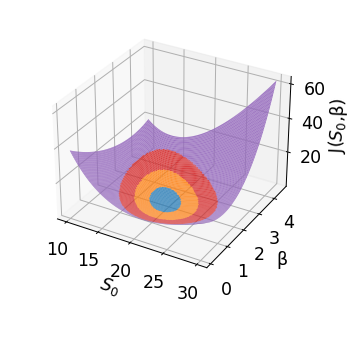

Text(0.5, 0, 'J($S_0$,β)')

In [13]:
fig1 = plt.figure(figsize=(4,4))
ax1 = fig1.subplots(subplot_kw={"projection": "3d"})
ax1.set_xlabel('$S_0$')
ax1.set_ylabel('β')
ax1.set_zlabel('J($S_0$,β)')

In [14]:
z.min()

0.33037543271644343

In [15]:
levels = z.min() + np.array([0, 1, 4, 9]) 
norm = colors.BoundaryNorm(boundaries=levels, ncolors=len(levels))

In [16]:
ax1.plot_surface(S0, beta, z, cmap=cm.tab10, norm=norm, rstride=1, cstride=1, linewidth=0)

In [17]:
# fig1.savefig('region_anormal_costo.svg')

## Contorno de niveles

<IPython.core.display.Javascript object>


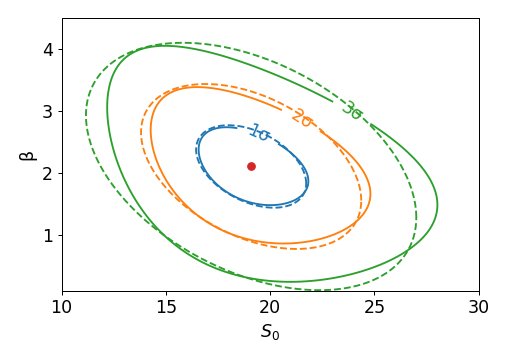

Text(0, 0.5, 'β')

In [18]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('$S_0$')
ax2.set_ylabel('β')

In [19]:
levels = z.min() + np.array([1, 4, 9]) 

contour = ax2.contour(S0, beta, z, levels, colors=['tab:blue', 'tab:orange', 'tab:green'])

fmt = {}
strs = ['1σ', '2σ', '3σ']
for l, s in zip(contour.levels, strs):
    fmt[l] = s
ax2.clabel(contour, fmt=fmt)

<a list of 3 text.Text objects>

## Estimadores de máxima verosimilitud

In [20]:
res = minimize(J, x0=(3,0.2))
res

      fun: 0.32967858568776953
 hess_inv: array([[ 3.4846057 , -0.36304105],
       [-0.36304105,  0.22166571]])
      jac: array([-5.51342964e-07, -3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 12
     njev: 13
   status: 0
  success: True
        x: array([19.08727867,  2.10270208])

In [21]:
theta_est = res.x
cova = 2 * res.hess_inv

In [22]:
theta_est

array([19.08727867,  2.10270208])

In [23]:
error = np.sqrt(np.diagonal(cova))
error

array([2.6399264 , 0.66583138])

In [24]:
rho = cova[0][1]/(error[0]*error[1])
rho

-0.4130757022592054

In [25]:
elipse_1sigma = get_ellipse(theta_est, cova, nsigma=1)
ax2.plot(*elipse_1sigma, ls='--')
elipse_2sigma = get_ellipse(theta_est, cova, nsigma=2)
ax2.plot(*elipse_2sigma, ls='--')
elipse_3sigma = get_ellipse(theta_est, cova, nsigma=3)
ax2.plot(*elipse_3sigma, ls='--')
ax2.plot(*theta_est, 'o')

In [ ]:
# fig2.savefig('region_anormal.svg')